# Problem Statement
Here let's work on regression. Find a data set and build a KNN Regression and an OLS regression. Compare the two. How similar are they? Do they miss in different ways?

Create a Jupyter notebook with your models. At the end in a markdown cell write a few paragraphs to describe the models' behaviors and why you favor one model or the other. Try to determine whether there is a situation where you would change your mind, or whether one is unambiguously better than the other. Lastly, try to note what it is about the data that causes the better model to outperform the weaker model. Submit a link to your notebook below.
### Outline
1. [dataset](#dataset)
2. [OLS regression](#ols_regression)
3. [KNN regression](#knn_regression)
4. [Write-up](#write_up)

<a id = 'dataset'></a>
# Dataset
I'm going to use a movie production dataset from the Opus group. This data contains 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import neighbors
import statsmodels.formula.api as smf
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from scipy import stats
from sklearn.metrics import mean_squared_error

In [2]:
data_path = '../../datasets/opusdata/opusdata.csv'
df = pd.read_csv(data_path)[['movie_name', 'production_year', 'production_budget', 'running_time', 'international_box_office']]
display(df.shape)
display(df.head(3))

(1784, 5)

,movie_name,production_year,production_budget,running_time,international_box_office
0,Peaceful Warrior,2006,10000000,NaN,366513
1,End of the Spear,2006,10000000,NaN,175380
2,Krrish,2006,10000000,NaN,31000000


In [3]:
df_null = df.isnull()
print (df_null.sum())

movie_name                    0
production_year               0
production_budget             0
running_time                117
international_box_office      0
dtype: int64


In [4]:
df_clean = df.dropna()
df_describe = df_clean.describe()
def highlight_zeros(val):
    if val < 1.0:
        return 'background-color: yellow'
    else: return ''
s = df_describe.style.applymap(highlight_zeros)
display(s)

,production_year,production_budget,running_time,international_box_office
count,1667,1667,1667,1667
mean,2011.11,5.51639e+07,108.768,9.81086e+07
std,3.1196,5.43566e+07,20.6402,1.59472e+08
min,2006,1e+07,0,0
25%,2009,2e+07,97,1.02973e+07
50%,2011,3.5e+07,107,3.84686e+07
75%,2014,7e+07,120,1.06446e+08
max,2017,4.25e+08,201,2.02341e+09


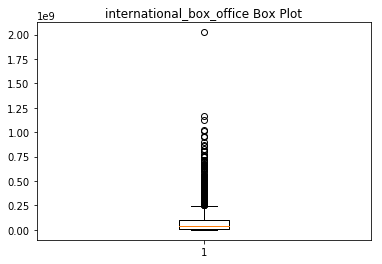

                                movie_name  production_year  \
690                                 Avatar             2009   
1454                             Furious 7             2014   
1601                        Jurassic World             2015   
1604  Star Wars Ep. VII: The Force Awakens             2015   
1725               The Fate of the Furious             2016   

      production_budget  running_time  international_box_office  
690           425000000         162.0                2023411357  
1454          190000000         137.0                1165715774  
1601          215000000         124.0                1019442583  
1604          306000000         136.0                1122000000  
1725          250000000         136.0                1011701261  


In [5]:
# plot outcome variable
plt.boxplot(df_clean['international_box_office'])
plt.title("international_box_office Box Plot")
plt.show()
print (df_clean[df_clean['international_box_office'] > 1000000000])

In [6]:
# define X and Y
X = df_clean[['production_year', 'production_budget', 'running_time']]
Y = df_clean['international_box_office']

<a id = 'ols_regression'></a>
# OLS Regression

R-squared Accuracy: 0.5554 (+/- 0.1529)
MSE Accuracy: -5.95e+07 (+/- 2.38e+07)

Parameters

 Intercept           -7.139990e+09
production_year      3.522677e+06
production_budget    2.212594e+00
running_time         2.901373e+05
dtype: float64

P-values

 Intercept             8.334221e-06
production_year       9.837958e-06
production_budget    5.892767e-302
running_time          2.056897e-02
dtype: float64

Confidence Intervals


,0,1
Intercept,-1.027265e+10,-4.007333e+09
production_year,1.964550e+06,5.080804e+06
production_budget,2.118999e+00,2.306190e+00
running_time,4.463790e+04,5.356368e+05


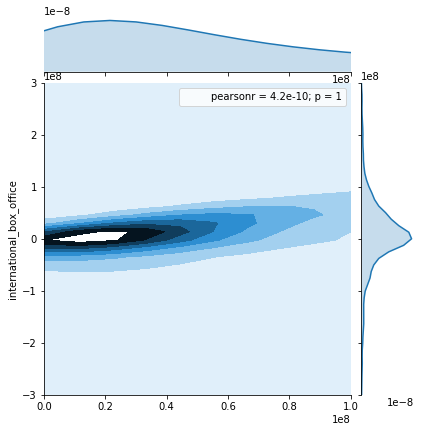

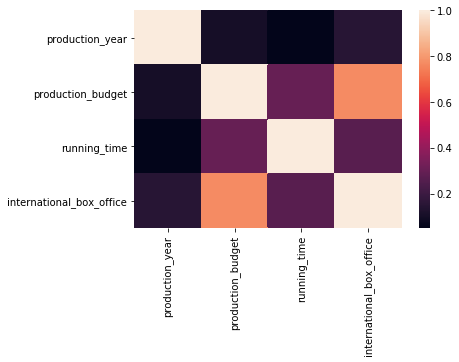

In [8]:
# set up OLS linear formula and evaluation function
    # all variables as-is
linear_formula = "international_box_office ~ production_year + production_budget + running_time"
lg_model = smf.ols(formula=linear_formula, data=df_clean).fit()
# 5 fold cross validation for r-squared
sk_lg_model = linear_model.LinearRegression()
ols_score = cross_val_score(sk_lg_model, X, Y, cv=5)
print("R-squared Accuracy: %0.4f (+/- %0.4f)" % (ols_score.mean(), ols_score.std() * 2))
ols_mse_score = cross_val_score(sk_lg_model, X, Y, cv=5, scoring = 'neg_mean_absolute_error')
print ("MSE Accuracy: %0.2e (+/- %0.2e)" % (ols_mse_score.mean(), ols_mse_score.std() * 2))
# check parameters
print ("\nParameters\n\n", lg_model.params)
# verify low p-values and confidence intervals to keep features
print ("\nP-values\n\n", lg_model.pvalues)
print ("\nConfidence Intervals")
display(lg_model.conf_int())
# residuals
ols_ypred = lg_model.predict()
ols_residual = ols_ypred - Y

sns.jointplot(ols_ypred, ols_residual, kind = 'kde', xlim = [0,100000000], ylim = [-300000000,300000000])
plt.show()

sns.heatmap(df_clean.corr())
plt.show()

<a id = 'knn_regression'></a>
# KNN Regression

Nearest neighbors: 5
R-squared Accuracy: 0.4741 (+/- 0.1240)
MSE Accuracy: -6.16e+07 (+/- 2.29e+07)
Nearest neighbors: 15
R-squared Accuracy: 0.5252 (+/- 0.0820)
MSE Accuracy: -5.74e+07 (+/- 2.22e+07)
Nearest neighbors: 25
R-squared Accuracy: 0.5295 (+/- 0.0781)
MSE Accuracy: -5.72e+07 (+/- 2.45e+07)
Nearest neighbors: 35
R-squared Accuracy: 0.5205 (+/- 0.0744)
MSE Accuracy: -5.78e+07 (+/- 2.54e+07)
Nearest neighbors: 45
R-squared Accuracy: 0.5233 (+/- 0.0845)
MSE Accuracy: -5.76e+07 (+/- 2.52e+07)
Nearest neighbors: 55
R-squared Accuracy: 0.5164 (+/- 0.0870)
MSE Accuracy: -5.78e+07 (+/- 2.53e+07)
Nearest neighbors: 65
R-squared Accuracy: 0.5138 (+/- 0.0890)
MSE Accuracy: -5.79e+07 (+/- 2.53e+07)


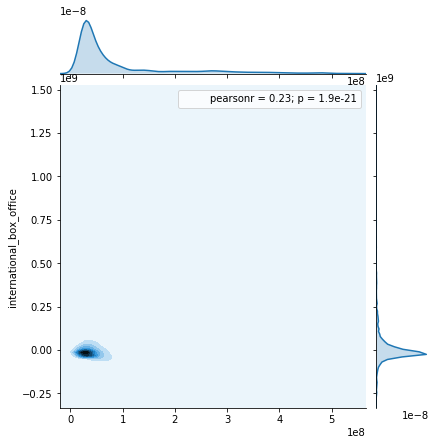

In [9]:
# Our input data frame will be the z-scores this time instead of raw data.
X_norm = X.apply(stats.zscore)
for k in range(5,75,10):
    knn = neighbors.KNeighborsRegressor(n_neighbors=k, weights='uniform')
    knn.fit(X_norm,Y)
    knn_ypred = knn.predict(X_norm)
    score = cross_val_score(knn, X_norm, Y, cv=5)
    print ("Nearest neighbors: {}".format(k))
    print("R-squared Accuracy: %0.4f (+/- %0.4f)" % (score.mean(), score.std() * 2))
    mse_score = cross_val_score(knn, X_norm, Y, cv=5, scoring = 'neg_mean_absolute_error')
    print ("MSE Accuracy: %0.2e (+/- %0.2e)" % (mse_score.mean(), mse_score.std() * 2))
# best k is 25
knn = neighbors.KNeighborsRegressor(n_neighbors=k, weights='uniform')
knn_score = cross_val_score(knn, X_norm, Y, cv=5)
knn_mse_score = cross_val_score(knn, X_norm, Y, cv=5, scoring = 'neg_mean_absolute_error')
knn.fit(X_norm,Y)
knn_ypred = knn.predict(X_norm)
knn_residual = Y - knn_ypred
sns.jointplot(knn_ypred, knn_residual, kind = "kde")
plt.show()

<a id = 'write_up'></a>
# Write-up
All iterations of the KNN regressor do not stack up against the OLS regressor. This may be because the data has a linear nature to it, rather than similar output values being due to similar input values. Although the OLS regressor has a slightly better r-squared, the KNN regressor maintains more consistent scores through cross-validation.

In [13]:
print ("R-squared Scores\tMSE Scores\nOLS: %0.4f\t\t%0.2e\nKNN: %0.4f\t\t%0.2e" % (ols_score.mean(), ols_mse_score.mean(), knn_score.mean(), knn_mse_score.mean()))

R-squared Scores	MSE Scores
OLS: 0.5554		-5.95e+07
KNN: 0.5138		-5.79e+07


<br>In choosing an algorithm for predicting international box office sales, I would choose the KNN regressor. It has a comparable R-squared and is homoscedastic. The one unique difference which guides my decision, is the fact that the training set contains outliers, both low (near 0) and high (near 2 billion). Unless given input extremely close to the input that causes these outliers, KNN will not make outlandish predictions for regular data. Here, linear regression may be less robust to outliers. 